# Behavoir of adavance time in driplines using hydraulic simulation by Python to increase the accuracy during the fertirrigation  

### By Gregory Guevara. Earth University 
#### January 2023

### Objective: To understand the behavoir and mathematical equations to describe the advance time in drip lines during fertigation process, using the hydraulic models for pressurized system by Python 

In [31]:

import math 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb

In [32]:
# inputs
q= 1 #flow l/h
S=0.5   #spacing between drippers 
L=150     #lenght of dripline 
dia=20.2  # internal diameter      

In [33]:

df=pd.DataFrame()
df["outlets"]=0
df["long_acum"]=0
df["q_tramo"]=0

df["v_tramo"]=0
df["t_tramo"]=0
df["t_acum"]=0
df["headloss"]=0
df["HL_acum"]=0


outlets=L/S
Q=outlets*q
qq=Q+q
a=range(1,int(outlets)+1)
ss=0
Area= 3.141516*(dia/2000)**2
for x in a: 
    qq=qq-q # decrease the flow for each outlet
    ss=ss+S #step for outlets index 
    df.at[x,'outlets']=x # column of N of outlets 
    df.at[x,'long_acum']=ss # column for acumulated lenght 
    df.at[x,'q_tramo']=qq
#calculating the travel time   
df["v_tramo"]=df["q_tramo"]/Area/3600/1000
df["t_tramo"]=S/df["v_tramo"]
df["t_acum"]=df['t_tramo'].cumsum()/60
travel_time= round(df["t_tramo"].sum()/60,)
aa=int(outlets*.95)
travel_time_95=round(df.loc[aa,'t_acum'],4)
#calculating the headloss 
df["headloss"]= 1.131*10**9*(df["q_tramo"]/1000/140)**1.852*S*dia**-4.872
HF=round(df["headloss"].sum(),2)
df["HL_acum"]=df['headloss'].cumsum()

#outputs 
print ("The travel time in 100% of lenght: " + str(travel_time) + " minutes")
print ("The travel time in 95% of lenght:  " + str(travel_time_95) + " minutes")
print ("The total head loss:  " + str(HF) + " m")
print (df.head())
print (df.describe())
df.to_csv('salida_basic.csv')


The travel time in 100% of lenght: 60 minutes
The travel time in 95% of lenght:  28.5 minutes
The total head loss:  0.3 m
   outlets  long_acum  q_tramo   v_tramo   t_tramo    t_acum  headloss  \
1      1.0        0.5    300.0  0.260038  1.922796  0.032047  0.002817   
2      2.0        1.0    299.0  0.259171  1.929227  0.064200  0.002799   
3      3.0        1.5    298.0  0.258304  1.935701  0.096462  0.002782   
4      4.0        2.0    297.0  0.257438  1.942218  0.128832  0.002765   
5      5.0        2.5    296.0  0.256571  1.948780  0.161312  0.002748   

    HL_acum  
1  0.002817  
2  0.005616  
3  0.008398  
4  0.011163  
5  0.013911  
          outlets   long_acum     q_tramo     v_tramo     t_tramo      t_acum  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean   150.500000   75.250000  150.500000    0.130452   12.080283    9.613981   
std     86.746758   43.373379   86.746758    0.075191   40.993237    9.528674   
min      1.000000    0.50

### Graph analysis for differents flows in driplines 

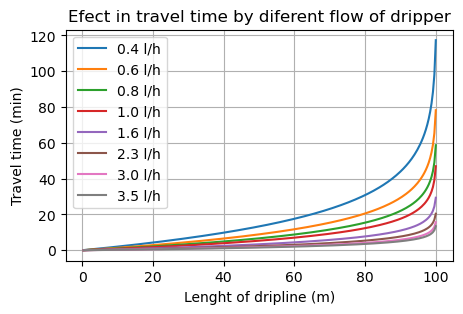

In [34]:
# inputs
dia=20.2
Area= 3.141516*(dia/2000)**2
item=1
S=0.4
flows=[0.4,0.6,0.8,1.0,1.6,2.3,3.0,3.5]
L=100
outlets=L/S

fig, ax1 = plt.subplots(figsize=(5,3))
ax1.grid(True)
ax1.set_xlabel('Lenght of dripline (m)')
ax1.set_ylabel('Travel time (min)')
ax1.set_title('Efect in travel time by diferent flow of dripper')

for fls in flows: # testing a range of typical dripper flows 
    q=fls
    Q=outlets*q
    qq=Q+q
    a=range(1,int(outlets)+1)
    df1=pd.DataFrame()
    df1["outlets"]=0
    df1["long_acum"]=0
    df1["q_tramo"]=0
    df1["v_tramo"]=0
    df1["t_tramo"]=0
    df1["t_tramo_acum"]=0
    ss=0
    
    for x in a: 
        qq=qq-q # decrease the flow for each outlets
        ss=ss+S #step for outlet index
        df1.at[x,'outlets']=x # column N outles "
        df1.at[x,'long_acum']=ss # column acumulate lenght"
        df1.at[x,'q_tramo']=qq
    #calculating the travel time   
    df1["v_tramo"]=df1["q_tramo"]/Area/3600/1000
    df1["t_tramo"]=S/df1["v_tramo"]
    df1["t_tramo_acum"]=df1['t_tramo'].cumsum()/60
    travel_time= round(df1["t_tramo"].sum()/60,2)
    aa=int(outlets*.95)
    travel_time_95=df1.loc[aa,'t_tramo_acum']
    #calculating the velocity 
    max_vel=Q/Area/1000/3600
    #calculating the headloss 
    df1["headloss"]= 1.131*10**9*(df["q_tramo"]/1000/140)**1.852*S*dia**-4.872
    HF=round(df["headloss"].sum(),2)

    rect1= ax1.plot(df1['long_acum'], df1['t_tramo_acum'], 
            label=str(q)+" l/h",linestyle='-')
    ax1.tick_params(axis='y')
    ax1.legend()
plt.show()
        

### simulator for multiples variables 

In [35]:
dfout=pd.DataFrame()
dfout["item"]=0
dfout["flow"]=0
dfout["spacing"]=0
dfout["lenght"]=0
dfout["diameter"]=0
dfout["fulltime"]=0
dfout["time95"]=0
dfout["velocity"]=0
dfout["headloss"]=0



ss=0
diameter=[13.6,16.2,22.2]
item=1
spacing= [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
flows=[0.4,0.6,0.8,1.0,1.6,2.3,3,3.5]
lenght=[20,40,80,120,160,200,250,300]
for diam in diameter:
    dia=diam
    Area= 3.141516*(dia/2000)**2
    for ln in lenght: #testing a range of lenghts 
        L=ln
        for fls in flows: # testing a range of typical dripper flows 
            q=fls
            for sp in spacing: #testing dripper spacing by 10 cm 
                S=sp
                outlets=L/S
                Q=outlets*q
                qq=Q+q
                a=range(1,int(outlets)+1)
                df1=pd.DataFrame()
                df1["outlets"]=0
                df1["long_acum"]=0
                df1["q_tramo"]=0
                df1["v_tramo"]=0
                df1["t_tramo"]=0
                df1["t_tramo_acum"]=0
                for x in a: 
                    qq=qq-q # decrease the flow for each outlets
                    ss=ss+S #step for outlet index
                    df1.at[x,'outlets']=x # column N outles "
                    df1.at[x,'long_acum']=ss # column acumulate lenght"
                    df1.at[x,'q_tramo']=qq
                #calculating the travel time   
                df1["v_tramo"]=df1["q_tramo"]/Area/3600/1000
                df1["t_tramo"]=S/df1["v_tramo"]
                df1["t_tramo_acum"]=df1['t_tramo'].cumsum()/60
                travel_time= round(df1["t_tramo"].sum()/60,2)
                aa=int(outlets*.95)
                travel_time_95=df1.loc[aa,'t_tramo_acum']
                #calculating the velocity 
                max_vel=Q/Area/1000/3600
                #calculating the headloss 
                df["headloss"]= 1.131*10**9*(df["q_tramo"]/1000/140)**1.852*S*dia**-4.872
                HF=round(df["headloss"].sum(),2)

                #outputs 
                dfout.at[item,'item']=item
                dfout.at[item,'flow']=q
                dfout.at[item,'spacing']=S
                dfout.at[item,'diameter']=dia
                dfout.at[item,'lenght']=L
                dfout.at[item,'fulltime']=travel_time
                dfout.at[item,'time95']=travel_time_95
                dfout.at[item,'velocity']=max_vel
                dfout.at[item,'headloss']=HF
                
                item+=1
print (dfout)

        

        item  flow  spacing  lenght  diameter  fulltime     time95  velocity  \
1        1.0   0.4      0.2    20.0      13.6     22.61  12.655566  0.076489   
2        2.0   0.4      0.3    20.0      13.6     26.31  18.157411  0.050993   
3        3.0   0.4      0.4    20.0      13.6     39.21  23.235266  0.038245   
4        4.0   0.4      0.5    20.0      13.6     46.61  30.271608  0.030596   
5        5.0   0.4      0.6    20.0      13.6     47.77  32.356773  0.025496   
...      ...   ...      ...     ...       ...       ...        ...       ...   
1532  1532.0   3.5      0.5   300.0      22.2     23.14   9.886747  1.507064   
1533  1533.0   3.5      0.6   300.0      22.2     27.04  11.851651  1.255886   
1534  1534.0   3.5      0.7   300.0      22.2     27.68  13.782285  1.076474   
1535  1535.0   3.5      0.8   300.0      22.2     34.53  15.700651  0.941915   
1536  1536.0   3.5      0.9   300.0      22.2     35.49  17.494271  0.837258   

      headloss  
1         0.82  
2    

In [36]:
dfout.to_csv('salida.csv')


In [37]:
from scipy.optimize import minimize
xm1 = np.array(dfout["flow"])  # flow_ dataframe to array 
xm2 = np.array(dfout["spacing"])   # spacing
xm3 = np.array(dfout["lenght"])  # lenght 
xm4 = np.array(dfout["diameter"])
ym = np.array(dfout["fulltime"])  # output for time_95%

# calculate y
def calc_y(x):
    a = x[0]
    b = x[1]
    c = x[2]
    d = x[3]
    e = x[4]
    #y = a * xm1 + b  # linear regression
    y = a * ( xm1 ** b ) * ( xm2 ** c ) * ( xm3 ** d )*(  xm4 ** e)
    return y

# define objective
def objective(x):
    # calculate y
    y = calc_y(x)
    # calculate objective
    obj = 0.0
    for i in range(len(ym)):
        obj = obj + ((y[i]-ym[i])/ym[i])**2    
    # return result
    return obj

# initial guesses
x0 = np.zeros(5)
x0[0] = 0.0 # a
x0[1] = 0.0 # b
x0[2] = 0.0 # c
x0[3] = 0.0 # d
x0[4] = 0.0 # e


# show initial objective
print('Initial Objective: ' + str(objective(x0)))

# optimize
# bounds on variables
my_bnds = (-100.0, 100.0)
bnds = (my_bnds, my_bnds, my_bnds, my_bnds, my_bnds)
solution = minimize(objective, x0, method='SLSQP',bounds=bnds)
x = solution.x
y = calc_y(x)

# show final objective
cObjective = 'Final Objective: ' + str(objective(x))
print(cObjective)

# print solution
print('Solution')
cA = 'A = ' + str(round(x[0],4))
print(cA)
cB = 'B = ' + str(round(x[1],4))
print(cB)
cC = 'C = ' + str(round(x[2],4))
print(cC)
cD = 'D = ' + str(round(x[3],4))
print(cD)
cE = 'E = ' + str(round(x[4],4))
print(cE)

#ym measured outcome
#y  predicted outcome
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(ym,y)
r2 = round(r_value**2,4)
cR2 = "R^2 correlation = " + str(round(r_value**2,4))
print(cR2)

cFormula = "Formula is : " + "\n" \
           + "travel time = A * flow^B * spacing^C * lenght^D* diameter^E"
cLegend = cFormula + "\n" + cA + "\n" + cB + "\n" \
           + cC + "\n" + cD + "\n"+ cE + "\n" + cR2



Initial Objective: 1536.0
Final Objective: 5.429238925824491
Solution
A = 0.0912
B = -1.0
C = 0.7824
D = 0.1928
E = 1.9999
R^2 correlation = 0.9933


# Aprendizaje Supervisado

##Paso 1. Definicion de funciones para poder analizar el DataSet con diferentes enfoques usando varios metodos


In [38]:

#Funcion para division de Datos para Training and Testing
def Data_Segregation(features,targets, x=5, verification = False,split=0.5):
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(features,targets, random_state=x, test_size=split) 

  #Verificamos los tamaños:
  if verification:
    print("Segregation verification, sizes:")
    print("X_train= ",X_train.shape)
    print("X_test= ",X_test.shape)
    print("y_train= ",y_train.shape)
    print("y_test= ",y_test.shape)

  return X_train, X_test, y_train, y_test


Paso 2. Seleccion de columnas, division de los datos para entrenamiento y prueba, y definicion de Casos.
Caso... Se usaran las demas caracteristicas, excluyendo fulltime, para poder predecirlo

Features: 'flow','spacing','lenght','diameter'
Targets: 'fulltime'

In [39]:
#Seleccioamos solo las columnas a usar

df=dfout
cols_to_use = ['flow','spacing','lenght','diameter','fulltime']
df = df[cols_to_use]
df.shape
#Definicion de features o targets, segun caso

features = df[['flow','spacing','lenght','diameter']]
targets = df['fulltime']


In [40]:
#Uso de funcion Data_Segregation, con un random_state de 13 y la visualizacion de tamanos activa, 0.75 para el tamaño del split
X_train, X_test, y_train, y_test = Data_Segregation (features,targets, 13, True,0.7)

Segregation verification, sizes:
X_train=  (460, 4)
X_test=  (1076, 4)
y_train=  (460,)
y_test=  (1076,)


## Funciones para correr algoritmos de ML

In [41]:

#Funcion para correr un modelo lineal 
def Linear_Regression(X_train, X_test, y_train, y_test, showScore = False, positiveBool=False):
  from sklearn.linear_model import LinearRegression
  lr=LinearRegression(positive = positiveBool).fit(X_train,y_train)

  trainScore = lr.score(X_train,y_train)
  testScore = lr.score(X_test,y_test)                      
  if showScore:
    print("Train score= ", trainScore)
    print("Test score= ", testScore)
  
  return trainScore, testScore



In [42]:
#Funcion para correr modelo lineal Ridge
def LRRidge(X_train, X_test, y_train, y_test, showScore = False, positiveBool=False, alphaNum = 1.0):
  from sklearn import linear_model
  reg = linear_model.Ridge(alpha=alphaNum, positive = positiveBool).fit(X_train,y_train)
  
  trainScore = reg.score(X_train,y_train)
  testScore = reg.score(X_test,y_test)                      
  if showScore:
    print("Train score= ", trainScore)
    print("Test score= ", testScore)
  
  return trainScore, testScore

In [43]:
#Funcion para correr SVM
def SVMachine(X_train, X_test, y_train, y_test, showScore = False, kernelStr="rbf", Creg=1.0, gammaStr="scale"):
  from sklearn.svm import SVR
  LinearSVR = SVR(kernel = kernelStr, C = Creg, gamma = gammaStr)

  #svr=LinearSVR().fit(X_train,y_train)
  LinearSVR.fit(X_train,y_train)

  trainScore = LinearSVR.score(X_train,y_train)
  testScore = LinearSVR.score(X_test,y_test)    

  if showScore:
    print("Train score= ", trainScore)
    print("Test score= ", testScore)

  return trainScore, testScore

In [44]:
#Funcion para correr Nearest Neighbors Regression
def kNNRegression(X_train, X_test, y_train, y_test, showScore = False, n=5,weightsStr="uniform", algorithmStr="auto"):
  from sklearn.neighbors import KNeighborsRegressor
  neigh = KNeighborsRegressor(n_neighbors=n,weights=weightsStr, algorithm=algorithmStr)
  neigh.fit(X_train, y_train)

  trainScore = neigh.score(X_train,y_train)
  testScore = neigh.score(X_test,y_test) 

  if showScore:
    print("Train score= ", trainScore)
    print("Test score= ", testScore)

  return trainScore, testScore


In [45]:
#Funcion para usar Ramdom Forest 

def RFRegressor (X_train, X_test, y_train, y_test, showScore = False, showClassifier = False, n=100, criterionStr = "squared_error", depth=None):
  from sklearn.ensemble import RandomForestRegressor
  reg_forest = RandomForestRegressor(n_estimators = n, criterion = criterionStr, max_depth = depth)
  reg_forest = reg_forest.fit(X_train, y_train)

  trainScore = reg_forest.score(X_train,y_train)
  testScore = reg_forest.score(X_test,y_test) 

  if showScore:
    print("Train score= ", trainScore)
    print("Test score= ", testScore)

  if showClassifier:
    print("Showing importances features classification:")
    from sklearn.ensemble import RandomForestClassifier
    importances = pd.DataFrame({'feature' : X_train.columns, 'importance':reg_forest.feature_importances_})
    importances = importances.sort_values('importance', ascending = False).set_index('feature')
    from matplotlib import pyplot as plt
    plt.style.use('ggplot')
    importances.plot.bar()

  return trainScore, testScore

In [46]:
#Función para correr desicion tree

def DTRegressor (X_train, X_test, y_train, y_test, showScore = False, showClassifier = False , criterion = "squared_error",prof=3):
  
  from sklearn.tree import DecisionTreeRegressor
  DTModel= DecisionTreeRegressor(max_depth=prof)
  DTModel.fit(X_train,y_train)
  trainScore = DTModel.score(X_train,y_train)
  testScore = DTModel.score(X_test,y_test) 

  if showScore:
    print("Train score= ", trainScore)
    print("Test score= ", testScore)

  if showClassifier:
    from sklearn.tree import export_graphviz 
    # export the decision tree to a tree.dot file
    # for visualizing the plot easily anywhere
    export_graphviz(DTModel, out_file ='tree.dot',feature_names =df['fulltime']) 

  return trainScore, testScore


## A continuacion corremos los modelos 


## Modelo lineal

In [47]:
#Uso de funcion Linear_Regression, con visualizacion de Scores y opcion de Non-negative least squares en el ultimo parametro de la funcion
#("When set to True, forces the coefficients to be positive")

print("Ordinary Least Squares")
a, b = Linear_Regression(X_train, X_test, y_train, y_test, True, False)

print ("****************************")
print("Ordinary Least Squares and Non-negative least squares")
a, b = Linear_Regression(X_train, X_test, y_train, y_test, True, True)


Ordinary Least Squares
Train score=  0.6161705250842248
Test score=  0.6679909064642293
****************************
Ordinary Least Squares and Non-negative least squares
Train score=  0.24538838228774595
Test score=  0.30018139129787513


In [48]:
#Uso de funcion LRRidge, con visualizacion de Scores, opcion de Non-negative least squares y opcion de Regularization strength (alpha)

print("Ridge regression and alpha equal to 1")
a, b = LRRidge(X_train, X_test, y_train, y_test, True, False, 1)
print("\n")

print("Ridge regression and alpha equal to 0.5")
a, b = LRRidge(X_train, X_test, y_train, y_test, True, False, 0.5)
print("\n")

print("Ridge regression and alpha equal to 0.3")
a, b = LRRidge(X_train, X_test, y_train, y_test, True, False, 0.3)
print("\n")


Ridge regression and alpha equal to 1
Train score=  0.6160172181033535
Test score=  0.6665243133293974


Ridge regression and alpha equal to 0.5
Train score=  0.6161306625528236
Test score=  0.6672773903780411


Ridge regression and alpha equal to 0.3
Train score=  0.6161559440093147
Test score=  0.6675679016160538




## SVM 

In [49]:
print("SVM with kernel = rbf, C = 1 and gamma = auto")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "rbf", 1, "auto")
print("\n")
print("SVM with kernel = rbf, C = 25 and gamma = auto")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "rbf", 25, "auto")

print("\n")
print("SVM with kernel = rbf, C = 100 and gamma = auto")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "rbf", 100, "auto")

print("\n")
print("SVM with kernel = rbf, C = 500 and gamma = auto")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "rbf", 500, "auto")

print("\n")



SVM with kernel = rbf, C = 1 and gamma = auto


Train score=  0.04559565526962128
Test score=  -0.014202313681391576


SVM with kernel = rbf, C = 25 and gamma = auto
Train score=  0.6442587296121358
Test score=  0.5886487027047694


SVM with kernel = rbf, C = 100 and gamma = auto
Train score=  0.8104477985530946
Test score=  0.7652628959154443


SVM with kernel = rbf, C = 500 and gamma = auto
Train score=  0.9239151929003071
Test score=  0.8907065301399693




## KNN Neighbors

In [50]:
#Uso de la funcion kNNRegression con visualizacion de Scores, definicion de neighbors, weights y algorithm

#kNNRegression(X_train, X_test, y_train, y_test, showScore, n, weights, algorithm)
#n: Number of neighbors to use
#weights = 'uniform', assigns equal weights to all points. 
#weights = 'distance' assigns weights proportional to the inverse of the distance from the query point
#algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
#Algorithm used to compute the nearest neighbors

print("KNN regression with neighbors = 1, weights = uniform and  algorithm = auto")
a, b = kNNRegression(X_train, X_test, y_train, y_test, True, 1, "uniform", "auto")


print("KNN regression with neighbors = 3, weights = uniform and  algorithm = auto")
a, b = kNNRegression(X_train, X_test, y_train, y_test, True, 3, "uniform", "auto")


print("KNN regression with neighbors = 5, weights = uniform and  algorithm = auto")
a, b = kNNRegression(X_train, X_test, y_train, y_test, True, 5, "uniform", "auto")



KNN regression with neighbors = 1, weights = uniform and  algorithm = auto
Train score=  1.0
Test score=  0.8060302917224912
KNN regression with neighbors = 3, weights = uniform and  algorithm = auto
Train score=  0.9400386987779432
Test score=  0.7978178034349679
KNN regression with neighbors = 5, weights = uniform and  algorithm = auto
Train score=  0.8625246472318663
Test score=  0.7406054331739294


## Random Forest


In [51]:
print("Random Forest  with n_estimators = 10, criterion = squared_error and max_depth = None")
a, b = RFRegressor (X_train, X_test, y_train, y_test, True, False, 10, "squared_error", None)



print("Random Forest  with n_estimators = 100, criterion = squared_error and max_depth = None")
a, b = RFRegressor (X_train, X_test, y_train, y_test, True, False, 100, "squared_error", None)


print("Random Forest  with n_estimators = 100, criterion = squared_error and max_depth = 10")
a, b = RFRegressor (X_train, X_test, y_train, y_test, True, False, 100, "squared_error", 10)



print("Random Forest  with n_estimators = 10, criterion = squared_error and max_depth = 5")
a, b = RFRegressor (X_train, X_test, y_train, y_test, True, False, 10, "squared_error", 5)


Random Forest  with n_estimators = 10, criterion = squared_error and max_depth = None
Train score=  0.9933416544664193
Test score=  0.9536844279779536
Random Forest  with n_estimators = 100, criterion = squared_error and max_depth = None
Train score=  0.9942128542772759
Test score=  0.95556778248304
Random Forest  with n_estimators = 100, criterion = squared_error and max_depth = 10
Train score=  0.9942904015819644
Test score=  0.9532428025347753
Random Forest  with n_estimators = 10, criterion = squared_error and max_depth = 5
Train score=  0.9589120333615473
Test score=  0.911030071149224


## Desicion tree

In [52]:
print("Desicion Tree Regressor , criterion = squared_error and max_depth = None")
a, b = DTRegressor (X_train, X_test, y_train, y_test, True,False, "squared_error", None)


print("Desicion Tree Regressor , criterion = squared_error and max_depth = 1")
a, b = DTRegressor (X_train, X_test, y_train, y_test, True,False, "squared_error",1)

print("Desicion Tree Regressor , criterion = squared_error and max_depth = 3")
a, b = DTRegressor (X_train, X_test, y_train, y_test, True,False, "squared_error", 3)



Desicion Tree Regressor , criterion = squared_error and max_depth = None
Train score=  1.0
Test score=  0.9070226405429066
Desicion Tree Regressor , criterion = squared_error and max_depth = 1
Train score=  0.36794966289860775
Test score=  0.26581546851599147
Desicion Tree Regressor , criterion = squared_error and max_depth = 3
Train score=  0.788081836412329
Test score=  0.7342646342698882
